In [20]:
import tensorflow as tf

In [21]:
dir(tf.keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [22]:
data = tf.keras.datasets.mnist.load_data()

In [23]:
data
# tensor == numpy + gpu사용가능한 기능 추가

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

data[0] : training data  
data[1] : test data

data[0][0] : X  
data[0][1] : y

In [24]:
data[0][0].shape
# 60000개 데이터, 가로 세로 28 * 28

(60000, 28, 28)

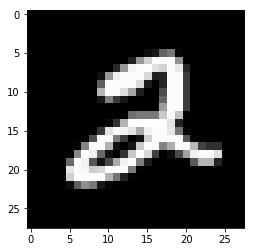

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.imshow(data[0][0][5], 'gray')

# 2차원 데이터(그림)는 한줄로 만들어서 학습시킴
# 머신러닝에서 썻던 기법 다 deep learning에서 쓸 수 있다. == 포함관계니까
tensorflow는 neural network최적화된 framework이다. 그러나 tensorflow에서도 ML도 가능


In [26]:
from sklearn.datasets import load_digits
# sklearn에도 유사한 데이터가 것이 있다.

In [27]:
digit = load_digits()

In [28]:
digit.data[0]
# classification == 정수이므로...

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier()

In [31]:
digit.data.shape

(1797, 64)

In [32]:
knn.fit(digit.data, digit.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
knn.predict(digit.data[3].reshape(1,-1))

array([3])

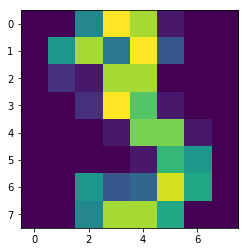

In [40]:
plt.imshow(digit.data[3].reshape(8, -1))

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()  # train test split
x_train, x_test = x_train / 255.0, x_test / 255.0  # feature scaling & numpy broadcasting
# ML에서 하던거랑 똑같네..!
# deep learning에서 cv하면 너무 오래걸려서 안 씀 == cv=10이면 10배 더 오래걸림ㄷㄷ

# 모델 구성
model = tf.keras.models.Sequential([  # layer가 순서대로 들어감
  tf.keras.layers.Flatten(input_shape=(28, 28)),  # 1차원으로 만들어줌 학습시키기 위해서...! : 748개 노드
  tf.keras.layers.Dense(128, activation=tf.nn.relu),  
    # fully connected layer == Dense, relu를 쓰면 overfitting이 안 일어남
    # 노가다해서 최적의 수를 찾아보라...!
    
# tf.keras.layers.Dropout(0.2),  # random하게 빼면 overfitting안 일어남
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # output
]) # 2-layer

# 어떻게 학습할지 전략을 세움
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=10)  # epochs == 반복 수
# 이 cell을 반복해서 실행하면 중첩해서 학습한다. 이 셀을 2번 실행하면 20번 학습됨
# restart kernel 

model.evaluate(x_test, y_test)

W0620 22:10:44.822353 4716922304 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2625 - accuracy: 0.9251
Epoch 2/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1169 - accuracy: 0.9661
Epoch 3/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0812 - accuracy: 0.9757
Epoch 4/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0608 - accuracy: 0.9815
Epoch 5/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0468 - accuracy: 0.9859
Epoch 6/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0371 - accuracy: 0.9885
Epoch 7/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0288 - accuracy: 0.9915
Epoch 8/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0242 - accuracy: 0.9926
Epoch 9/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0192 - accuracy: 0.9940
Epoch 10/10
10

[0.07679965075031214, 0.9788]

In [41]:
# loss: 0.0766 # 적을수록 좋다.

In [2]:
model.evaluate(x_test, y_test)
# overfitting이 일어났는지 확인할 때 사용
# 훈련 데이터보다 정확도가 높다면 overfitting일 가능성이 높다.

10000/10000 [==============================] - 0s 23us/sample - loss: 0.0768 - accuracy: 0.9788


[0.07679965075031214, 0.9788]

데이터마다 잘되는 모델이 다르다 == no free lunch